In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [29]:
# Generation of independet vectors with mean 0 and variance 1 and independent random labels +1 and -1 
# with equal probability 0.5
# Returns feature vectors and their labels

def generate_data (P, N):
    vectors = np.transpose([np.random.standard_normal(P) for _ in range(N)])
    labels = np.random.choice([-1, 1], P)
    #print(labels)
    return vectors, labels
#generate_data(5, 3)

[-1 -1  1  1 -1]


(array([[-1.1582642 , -0.25470769,  0.44823899],
        [-1.73602692, -0.40919647, -0.73752124],
        [-0.49801767, -0.80275946,  0.95177867],
        [-1.75166546, -0.74033323,  0.50065247],
        [ 0.55037869,  0.17421984,  0.4267489 ]]),
 array([-1, -1,  1,  1, -1]))

In [31]:
# Implementation of Rosenblatt perceptron algorithm
# Returns true if the weight vector is never changed, otherwise returns false

def training(P, N, n_max):
    weight_vector = np.zeros(N)
    vectors, labels = generate_data(P, N)
    epoch = 1

    while epoch <= n_max:
        weight_changed = False
        
        for i in range(0, P):
            data_point = vectors[i]
            label = labels[i]
            ev_t = np.dot(weight_vector, data_point) * label
            if ev_t <= 0:
                weight_changed = True
                weight_vector = weight_vector + (1/N * data_point * label)

        if not weight_changed:
            return True

        epoch += 1

    return False

In [19]:
# Repeat the Rosenblatt perceptron algorithm for given values a, N, n_D and n_max
# If traning function returns true, success count increases by 1
# Returns the success fraction dividing the count by n_D (n_D represents the number of randomly generated dataset)

def repeat(a, N=20, n_D=50, n_max=100):
    P = int(a * N)
    print ("Repeating the training for N={} P={} a={}".format(N, P, a))
    count = 0
    
    for i in range(0, n_D):
        if training(P, N, n_max):
            count += 1

    fraction = count / n_D
    print("Computed success fraction:", fraction)
    return fraction

Repeating the training for N=20 P=15 a=0.75
Computed success fraction: 1.0
Repeating the training for N=20 P=20 a=1.0
Computed success fraction: 1.0
Repeating the training for N=20 P=25 a=1.25
Computed success fraction: 0.96
Repeating the training for N=20 P=30 a=1.5
Computed success fraction: 0.86
Repeating the training for N=20 P=35 a=1.75
Computed success fraction: 0.5
Repeating the training for N=20 P=40 a=2.0
Computed success fraction: 0.26
Repeating the training for N=20 P=45 a=2.25
Computed success fraction: 0.1
Repeating the training for N=20 P=50 a=2.5
Computed success fraction: 0.0
Repeating the training for N=20 P=55 a=2.75
Computed success fraction: 0.0
Repeating the training for N=20 P=60 a=3.0
Computed success fraction: 0.0


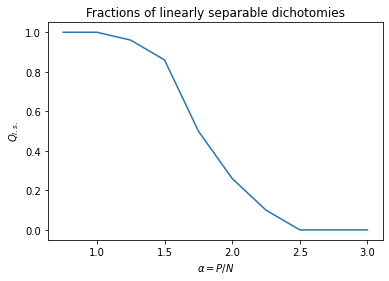

In [20]:
# Calls repeat function for different a values 
# Plot the fraction vs. a values graph

a_values = [a for a in np.arange(0.75, 3.25, 0.25)]
fractions = [repeat(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$Q_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()

In [27]:
# Repeat the Rosenblatt perceptron algorithm for given values a, N, n_D and n_max
# If traning function returns true, success count increases by 1
# Returns the success fraction dividing the count by n_D (n_D represents the number of randomly generated dataset)

def p_ls(a, N=20, n_D=50, n_max=100):
    P = int(a * N)
    prob = 0
    #prob_array = []
    
    for i in range(0, n_D):
        if P <= N:
            prob += 1
            #prob_array.append(prob)
        else:
            prob += 2**(1-P)*sum(comb(P-1, i) for i in range(0, N))
            #prob_array.append(prob)
    fraction = prob / n_D
    print("Computed success fraction:", fraction)
    return fraction

Computed success fraction: 1.0
Computed success fraction: 1.0
Computed success fraction: 0.9992280602455139
Computed success fraction: 0.9692858271300793
Computed success fraction: 0.804235847434029
Computed success fraction: 0.5
Computed success fraction: 0.22569041619806285
Computed success fraction: 0.07620388598073902
Computed success fraction: 0.02011178204785835
Computed success fraction: 0.004320749841640873


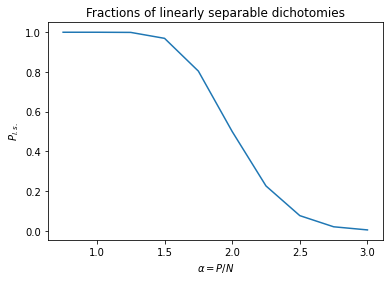

In [28]:
# Calls repeat function for different a values 
# Plot the fraction vs. a values graph

a_values = [a for a in np.arange(0.75, 3.25, 0.25)]
fractions = [p_ls(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$P_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()

In [6]:
def repeat(a, N=50, n_D=50, n_max=100):
    P = int(a * N)
    print ("Repeating the training for N={} P={} a={}".format(N, P, a))
    count = 0
    
    for i in range(0, n_D):
        if training(P, N, n_max):
            count += 1

    fraction = count / n_D
    print("Computed success fraction:", fraction)
    return fraction

Repeating the training for N=50 P=75 a=1.5
Computed success fraction: 0.96
Repeating the training for N=50 P=80 a=1.6
Computed success fraction: 0.74
Repeating the training for N=50 P=85 a=1.7000000000000002
Computed success fraction: 0.48
Repeating the training for N=50 P=90 a=1.8000000000000003
Computed success fraction: 0.3
Repeating the training for N=50 P=95 a=1.9000000000000004
Computed success fraction: 0.04
Repeating the training for N=50 P=100 a=2.0000000000000004
Computed success fraction: 0.0
Repeating the training for N=50 P=105 a=2.1000000000000005
Computed success fraction: 0.02
Repeating the training for N=50 P=110 a=2.2000000000000006
Computed success fraction: 0.02
Repeating the training for N=50 P=115 a=2.3000000000000007
Computed success fraction: 0.0
Repeating the training for N=50 P=120 a=2.400000000000001
Computed success fraction: 0.0
Repeating the training for N=50 P=125 a=2.500000000000001
Computed success fraction: 0.0


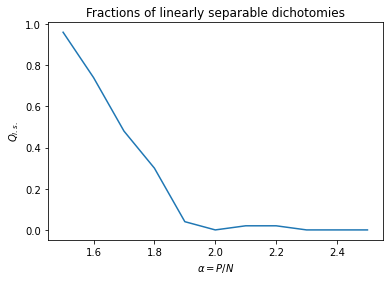

In [7]:
a_values = [a for a in np.arange(1.5, 2.6, 0.1)]
fractions = [repeat(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$Q_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()

In [8]:
def repeat(a, N=100, n_D=50, n_max=100):
    P = int(a * N)
    print ("Repeating the training for N={} P={} a={}".format(N, P, a))
    count = 0
    
    for i in range(0, n_D):
        if training(P, N, n_max):
            count += 1

    fraction = count / n_D
    print("Computed success fraction:", fraction)
    return fraction

Repeating the training for N=100 P=150 a=1.5
Computed success fraction: 0.96
Repeating the training for N=100 P=160 a=1.6
Computed success fraction: 0.6
Repeating the training for N=100 P=170 a=1.7000000000000002
Computed success fraction: 0.28
Repeating the training for N=100 P=180 a=1.8000000000000003
Computed success fraction: 0.2
Repeating the training for N=100 P=190 a=1.9000000000000004
Computed success fraction: 0.06
Repeating the training for N=100 P=200 a=2.0000000000000004
Computed success fraction: 0.0
Repeating the training for N=100 P=210 a=2.1000000000000005
Computed success fraction: 0.0
Repeating the training for N=100 P=220 a=2.2000000000000006
Computed success fraction: 0.0
Repeating the training for N=100 P=230 a=2.3000000000000007
Computed success fraction: 0.0
Repeating the training for N=100 P=240 a=2.400000000000001
Computed success fraction: 0.0
Repeating the training for N=100 P=250 a=2.500000000000001
Computed success fraction: 0.0


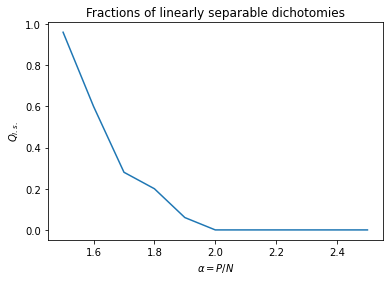

In [9]:
a_values = [a for a in np.arange(1.5, 2.6, 0.1)]
fractions = [repeat(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$Q_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()

In [10]:
def repeat(a, N=300, n_D=50, n_max=100):
    P = int(a * N)
    print ("Repeating the training for N={} P={} a={}".format(N, P, a))
    count = 0
    
    for i in range(0, n_D):
        if training(P, N, n_max):
            count += 1

    fraction = count / n_D
    print("Computed success fraction:", fraction)
    return fraction

Repeating the training for N=300 P=450 a=1.5
Computed success fraction: 0.82
Repeating the training for N=300 P=480 a=1.6
Computed success fraction: 0.38
Repeating the training for N=300 P=510 a=1.7000000000000002
Computed success fraction: 0.04
Repeating the training for N=300 P=540 a=1.8000000000000003
Computed success fraction: 0.0
Repeating the training for N=300 P=570 a=1.9000000000000004
Computed success fraction: 0.0
Repeating the training for N=300 P=600 a=2.0000000000000004
Computed success fraction: 0.0
Repeating the training for N=300 P=630 a=2.1000000000000005
Computed success fraction: 0.0
Repeating the training for N=300 P=660 a=2.2000000000000006
Computed success fraction: 0.0
Repeating the training for N=300 P=690 a=2.3000000000000007
Computed success fraction: 0.0
Repeating the training for N=300 P=720 a=2.400000000000001
Computed success fraction: 0.0
Repeating the training for N=300 P=750 a=2.500000000000001
Computed success fraction: 0.0


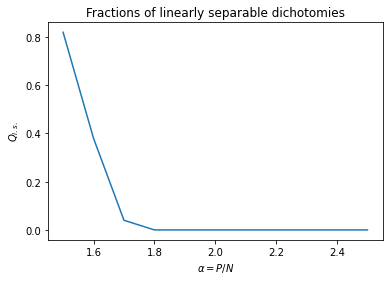

In [11]:
a_values = [a for a in np.arange(1.5, 2.6, 0.1)]
fractions = [repeat(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$Q_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()

In [38]:
# c value can be changed to obtain diffrent results and graphs

def training(P, N, n_max):
    weight_vector = np.zeros(N)
    vectors, labels = generate_data(P, N)
    epoch = 1
    c = 10

    while epoch <= n_max:
        weight_changed = False
        
        for i in range(0, P):
            data_point = vectors[i]
            label = labels[i]
            ev_t = np.dot(weight_vector, data_point) * label
            if ev_t < c:
                weight_changed = True
                weight_vector = weight_vector + (1/N * data_point * label)

        if not weight_changed:
            return True

        epoch += 1

    return False

In [39]:
def repeat(a, N=20, n_D=50, n_max=100):
    P = int(a * N)
    print ("Repeating the training for N={} P={} a={}".format(N, P, a))
    count = 0
    
    for i in range(0, n_D):
        if training(P, N, n_max):
            count += 1

    fraction = count / n_D
    print("Computed success fraction:", fraction)
    return fraction

Repeating the training for N=20 P=15 a=0.75
Computed success fraction: 0.76
Repeating the training for N=20 P=20 a=1.0
Computed success fraction: 0.3
Repeating the training for N=20 P=25 a=1.25
Computed success fraction: 0.06
Repeating the training for N=20 P=30 a=1.5
Computed success fraction: 0.02
Repeating the training for N=20 P=35 a=1.75
Computed success fraction: 0.0
Repeating the training for N=20 P=40 a=2.0
Computed success fraction: 0.0
Repeating the training for N=20 P=45 a=2.25
Computed success fraction: 0.0
Repeating the training for N=20 P=50 a=2.5
Computed success fraction: 0.0
Repeating the training for N=20 P=55 a=2.75
Computed success fraction: 0.0
Repeating the training for N=20 P=60 a=3.0
Computed success fraction: 0.0


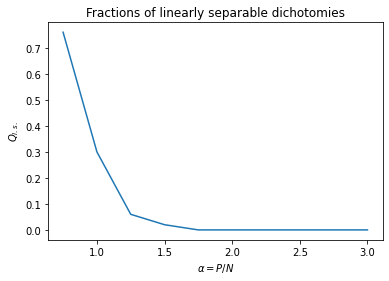

In [40]:
a_values = [a for a in np.arange(0.75, 3.25, 0.25)]
fractions = [repeat(a) for a in a_values]

plt.plot(a_values, fractions)
plt.xlabel(r'$\alpha = P/N$')
plt.ylabel(r'$Q_{l.s.}$')
plt.title("Fractions of linearly separable dichotomies")
plt.show()